In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
covid_data = pd.read_csv("covid.csv", sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'covid.csv'

In [ ]:
covid_data.head()

In [ ]:
covid_data['fecha_diagnostico'] = pd.to_datetime(covid_data['fecha_diagnostico'])

In [ ]:
##Graficamos la libreria matplotlib, por sexo, edad, provincias y fecha de diagnostico
sns.countplot(data=covid_data, x= 'sexo', hue='clasificacion_resumen')
plt.title('Cantidad de casos por sexo')
plt.show()

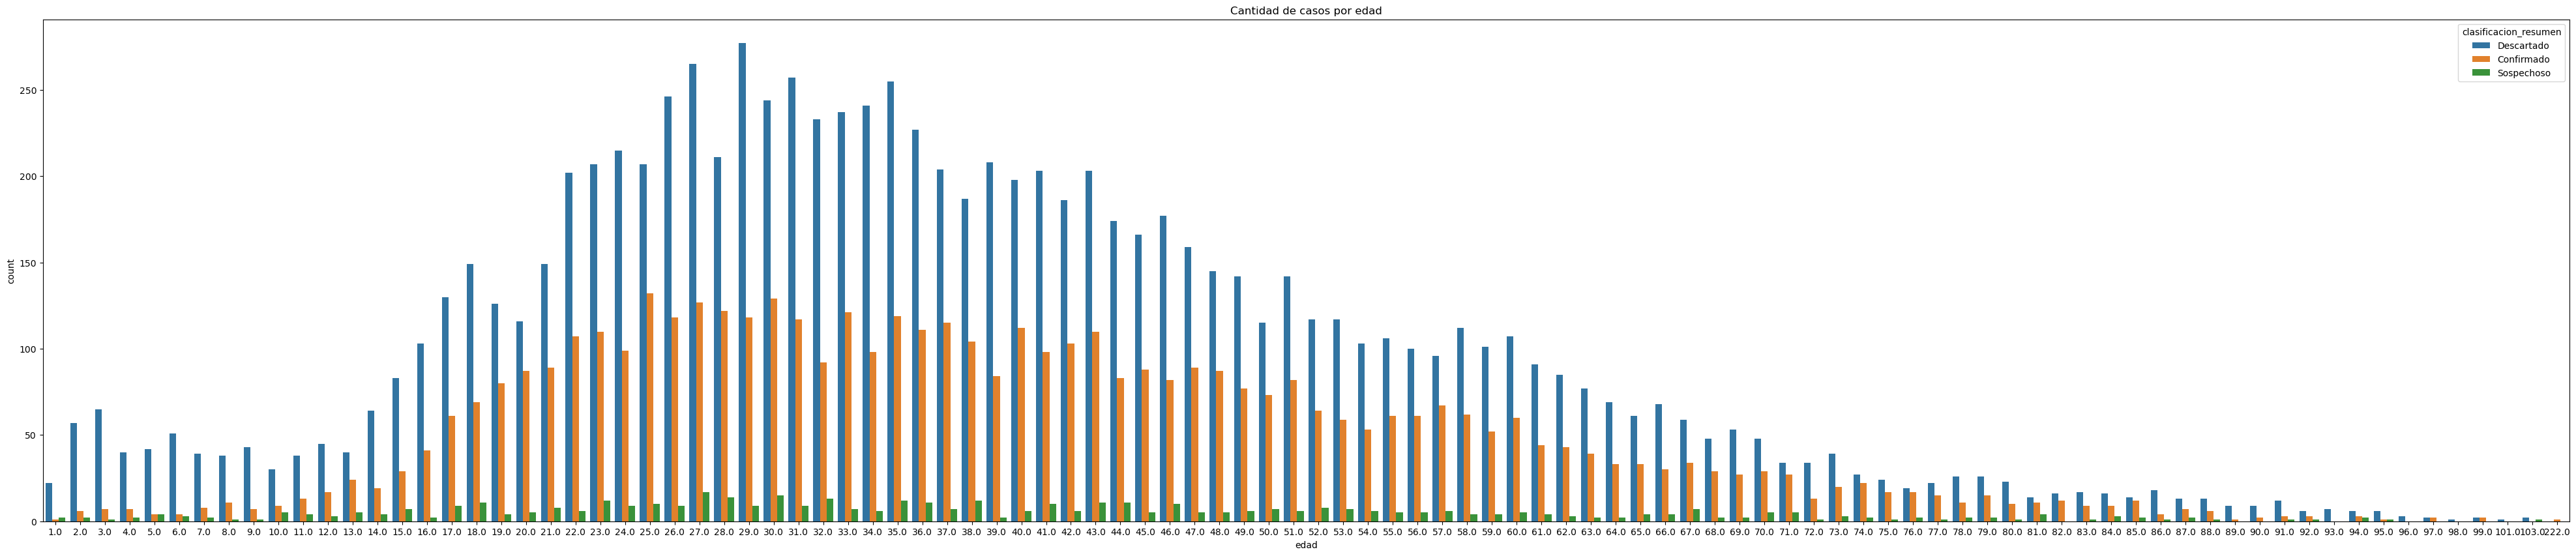

In [183]:
plt.figure(figsize=(50, 10))
sns.countplot(data=covid_data, x= 'edad', hue='clasificacion_resumen')
plt.title('Cantidad de casos por edad')
plt.show()

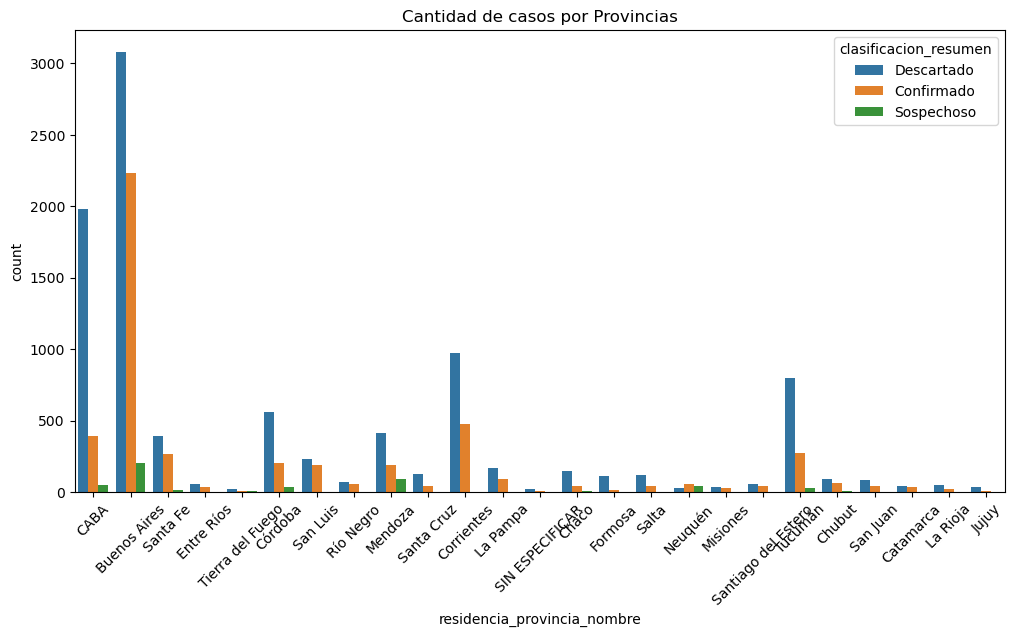

In [156]:
plt.figure(figsize=(12, 6))
sns.countplot(data=covid_data, x='residencia_provincia_nombre', hue='clasificacion_resumen')
plt.xticks(rotation=45)
plt.title('Cantidad de casos por Provincias')
plt.show()

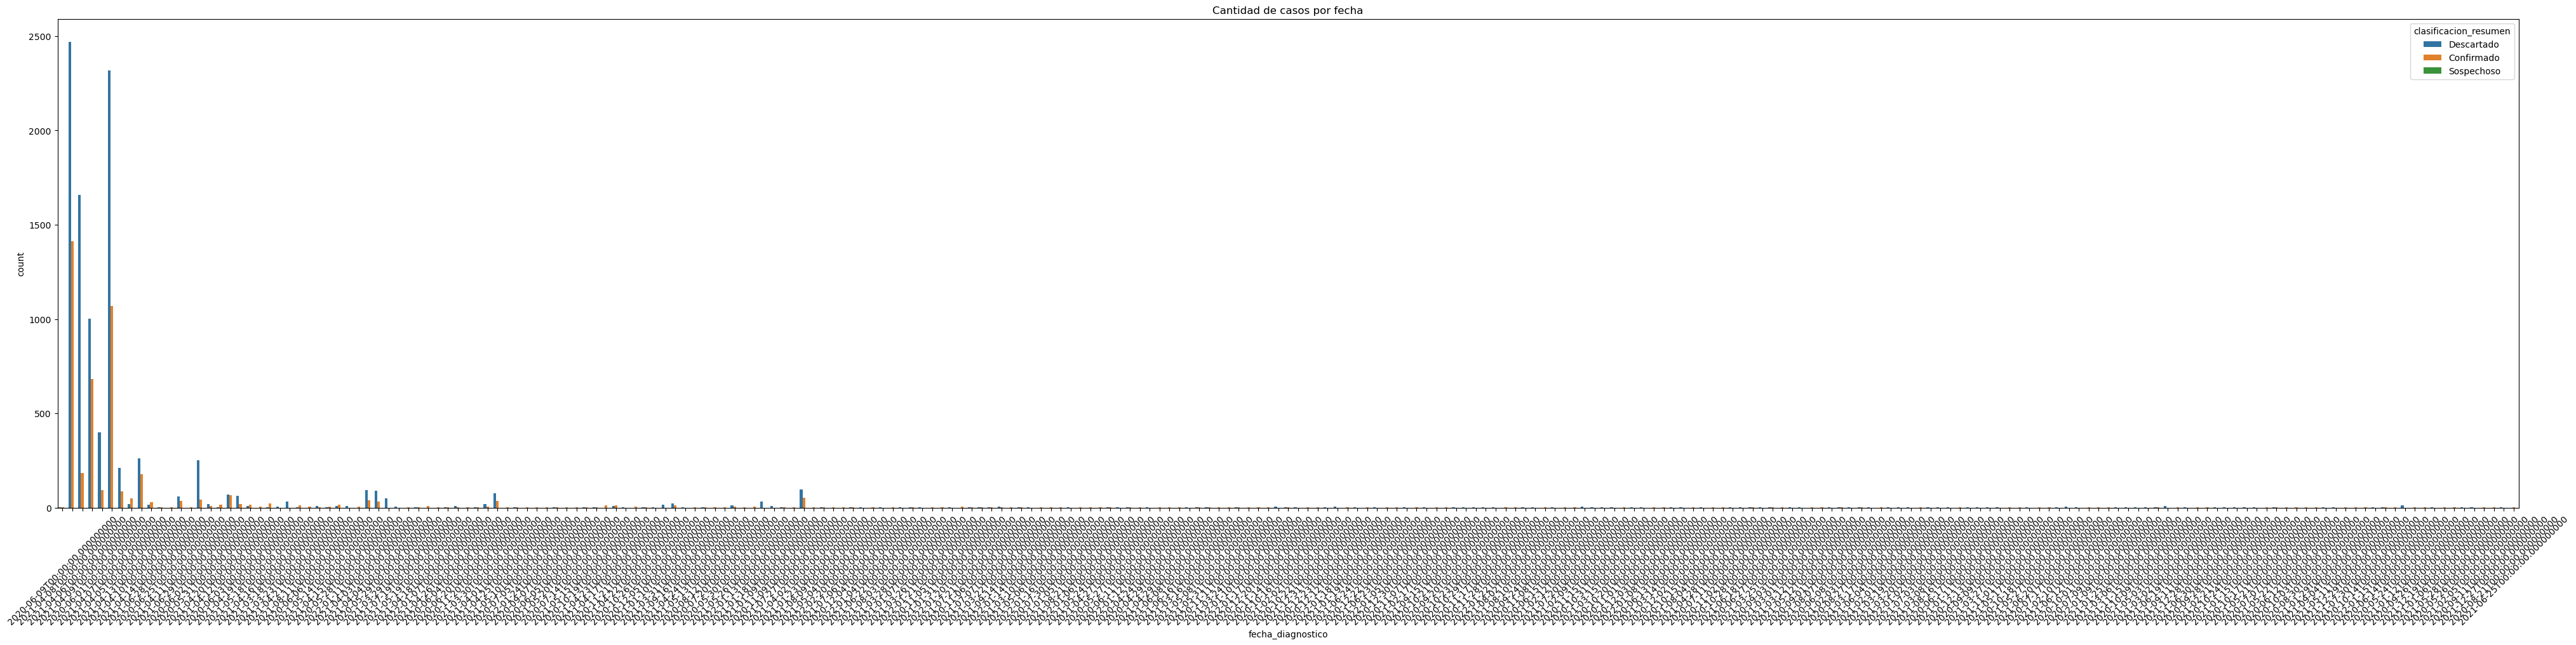

In [196]:
plt.figure(figsize=(50, 10))
sns.countplot(data=covid_data, x= 'fecha_diagnostico', hue='clasificacion_resumen')
plt.xticks(rotation=45)
plt.title('Cantidad de casos por fecha')
plt.show()


In [136]:
##Seleccionamos columnas que vamos a utilizar y quitamos los valores NaN
columnas = ['sexo', 'edad', 'residencia_provincia_id', 'clasificacion_resumen', 'fecha_diagnostico']
datos_seleccionados = covid_data[columnas].dropna()

In [162]:
##Cambiamos a numeros las columas de texto para poder hacer la regresion lineal
label_encoder = LabelEncoder()
for column in ['sexo', 'clasificacion_resumen', 'fecha_diagnostico']:
    datos_seleccionados[column] = label_encoder.fit_transform(datos_seleccionados[column])

In [164]:
##visualizamos los datos
##Sexo: M = 1, F = 0, NR = 2
##Clasificacion resumen: Descartado = 1, Confirmado = 0
datos_seleccionados.head()

sexo  edad  residencia_provincia_id  clasificacion_resumen  \
0     1  55.0                        2                      1   
1     0  53.0                        2                      1   
2     0  23.0                        6                      1   
3     0  45.0                        6                      1   
4     0  34.0                        2                      1   

   fecha_diagnostico  
0                 16  
1                142  
2                142  
3                140  
4                142

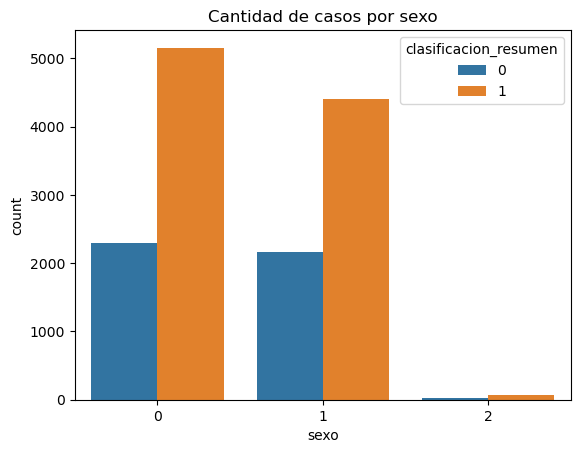

In [166]:
##Graficamos la libreria matplotlib, por sexo, edad, provincias y fecha de diagnostico
sns.countplot(data=datos_seleccionados, x= 'sexo', hue='clasificacion_resumen')
plt.title('Cantidad de casos por sexo')
plt.show()

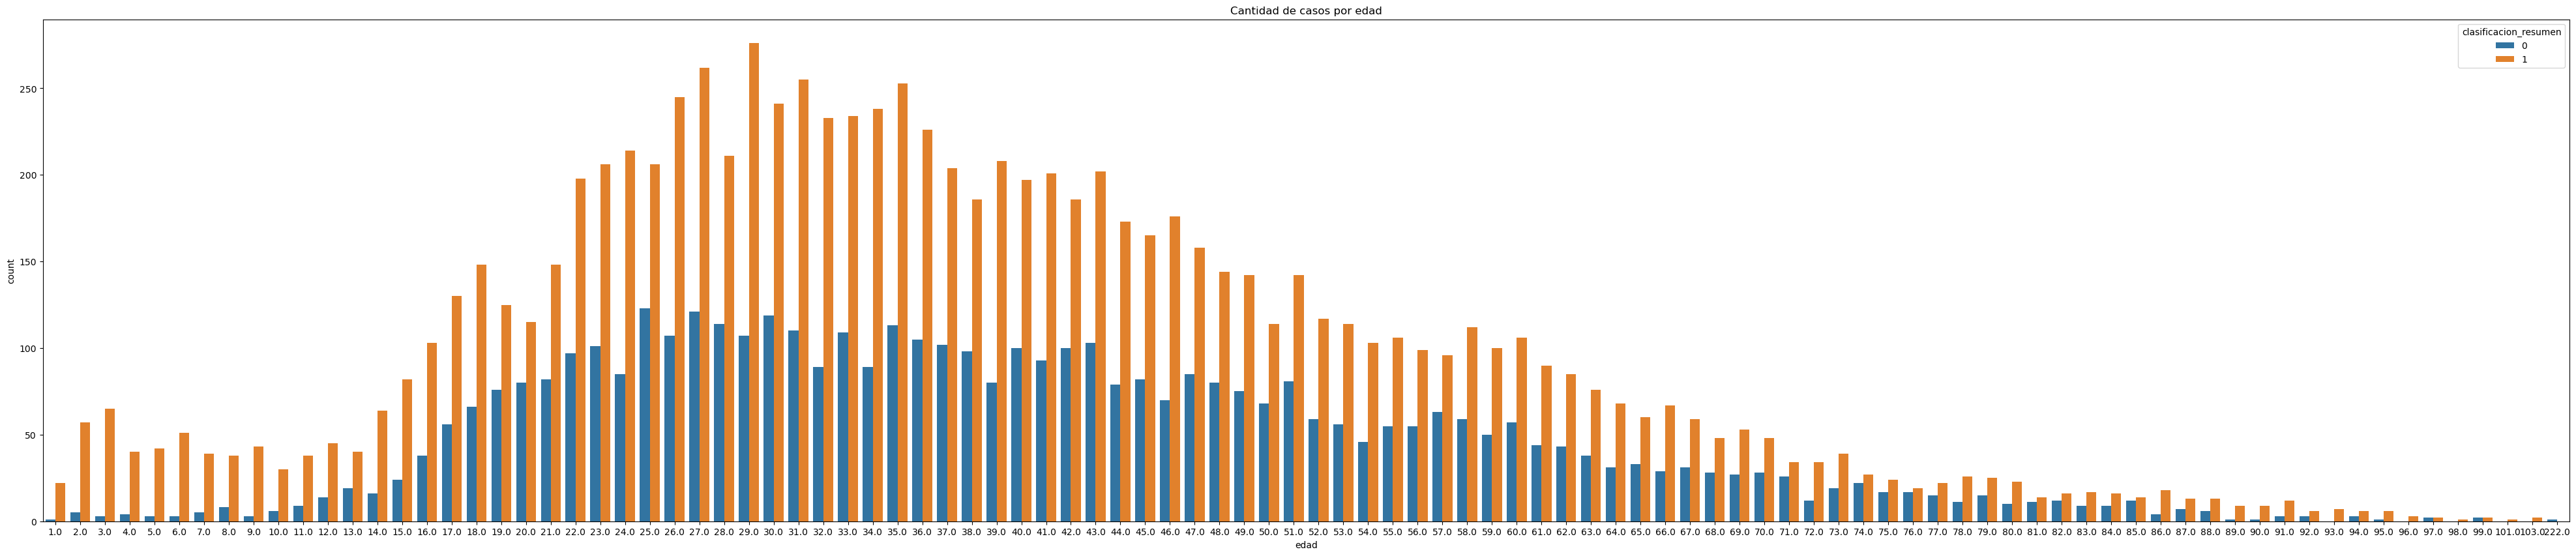

In [181]:
plt.figure(figsize=(50, 10))
sns.countplot(data=datos_seleccionados, x= 'edad', hue='clasificacion_resumen')
plt.title('Cantidad de casos por edad')
plt.show()

In [290]:
##guardamos los datos en las variables x e y, x compara todas las columnas excepto calsificacion_resumen
X = datos_seleccionados.drop('clasificacion_resumen', axis=1)
y = datos_seleccionados['clasificacion_resumen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [294]:
y_pred = model.predict(X_test)

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.68


In [298]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      0.01      0.02       910
           1       0.68      1.00      0.81      1914

    accuracy                           0.68      2824
   macro avg       0.78      0.50      0.41      2824
weighted avg       0.75      0.68      0.55      2824



In [302]:
##Utilizando random forest
modeloRFC = RandomForestClassifier(random_state=42)
modeloRFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [304]:
y_pred = modeloRFC.predict(X_test)

In [306]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.68


In [308]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.37      0.43       910
           1       0.73      0.82      0.77      1914

    accuracy                           0.68      2824
   macro avg       0.62      0.60      0.60      2824
weighted avg       0.66      0.68      0.66      2824

